# Import Library, Insert CSV, Menghapus Null

In [38]:
#Import library yang diperlukan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

#Import warnings untuk mengignore warning yang muncul 
import warnings
warnings.filterwarnings('ignore') 

In [39]:
#membaca file csv dari penyimpanan lokal
#df = pd.read_csv('indeks-standar-pencemar-udara-di-spku-bulan-januari-juli-2021.csv')
#membaca file csv dari raw file github
df = pd.read_csv('https://raw.githubusercontent.com/SMAMHTN/Final-Project-Microcredential/main/Pengerjaan/indeks-standar-pencemar-udara-di-spku-bulan-januari-juli-2021.csv')
df.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-01-01,DKI1 (Bunderan HI),38.0,53.0,29.0,6.0,31.0,13.0,53,PM25,SEDANG
1,2021-01-02,DKI1 (Bunderan HI),27.0,46.0,27.0,7.0,47.0,7.0,47,O3,BAIK
2,2021-01-03,DKI1 (Bunderan HI),44.0,58.0,25.0,7.0,40.0,13.0,58,PM25,SEDANG
3,2021-01-04,DKI1 (Bunderan HI),30.0,48.0,24.0,4.0,32.0,7.0,48,PM25,BAIK
4,2021-01-05,DKI1 (Bunderan HI),38.0,53.0,24.0,6.0,31.0,9.0,53,PM25,SEDANG


In [40]:
#mencari info dari data (data nul sekaligus datatype dari setiap features yang ada)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   1060 non-null   object 
 1   stasiun   1060 non-null   object 
 2   pm10      1024 non-null   float64
 3   pm25      980 non-null    float64
 4   so2       1041 non-null   float64
 5   co        1035 non-null   float64
 6   o3        1024 non-null   float64
 7   no2       1038 non-null   float64
 8   max       1060 non-null   int64  
 9   critical  1052 non-null   object 
 10  categori  1060 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 91.2+ KB


In [41]:
#membuang fetures yang tidak digunakan dalam proses prediksi
df = df.drop(['tanggal','stasiun'],axis=1)

In [42]:
#mencari jumlah null di setiap features
df.isnull().sum(axis=0)

pm10        36
pm25        80
so2         19
co          25
o3          36
no2         22
max          0
critical     8
categori     0
dtype: int64

In [43]:
#membuang baris yang terdapat null
df = df.dropna(axis=0)

In [44]:
# menghitung jumlah null pada tiap features
df.isnull().sum(axis=0)

pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
dtype: int64

In [45]:
#melihat info null dan datatype dari setiap features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 0 to 1059
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm10      902 non-null    float64
 1   pm25      902 non-null    float64
 2   so2       902 non-null    float64
 3   co        902 non-null    float64
 4   o3        902 non-null    float64
 5   no2       902 non-null    float64
 6   max       902 non-null    int64  
 7   critical  902 non-null    object 
 8   categori  902 non-null    object 
dtypes: float64(6), int64(1), object(2)
memory usage: 70.5+ KB


# Menelaah data pada kolom sumbu X
## pm10,pm25,so2,co,o3,no2,max

In [46]:
#melihat korelasi antara tiap fetures dengan metode pearson
df.corr(method='pearson')

,pm10,pm25,so2,co,o3,no2,max
pm10,1.000000,0.846170,0.464006,0.329147,0.232360,0.434112,0.865432
pm25,0.846170,1.000000,0.372520,0.300456,0.078103,0.385740,0.969772
so2,0.464006,0.372520,1.000000,-0.102424,0.278766,0.052719,0.358108
co,0.329147,0.300456,-0.102424,1.000000,0.039404,0.505375,0.304508
o3,0.232360,0.078103,0.278766,0.039404,1.000000,-0.200705,0.167783
no2,0.434112,0.385740,0.052719,0.505375,-0.200705,1.000000,0.373084
max,0.865432,0.969772,0.358108,0.304508,0.167783,0.373084,1.000000


In [47]:
#melihat nilai mean,modus, quartile n, dan unique pada setiap features
df.describe(include="all")

,pm10,pm25,so2,co,o3,no2,max,critical,categori
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902,902
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PM25,SEDANG
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,850,649
mean,53.106430,79.601996,33.302661,12.565410,31.633038,20.221729,80.720621,NaN,NaN
std,15.236274,24.750029,12.059986,5.204544,16.225777,9.265097,23.685687,NaN,NaN
min,15.000000,13.000000,2.000000,3.000000,9.000000,3.000000,20.000000,NaN,NaN
25%,43.000000,62.000000,24.000000,9.000000,20.000000,13.000000,64.000000,NaN,NaN
50%,55.000000,79.000000,31.000000,12.000000,27.000000,19.000000,79.000000,NaN,NaN
75%,64.000000,94.000000,41.000000,15.000000,39.000000,25.750000,94.750000,NaN,NaN


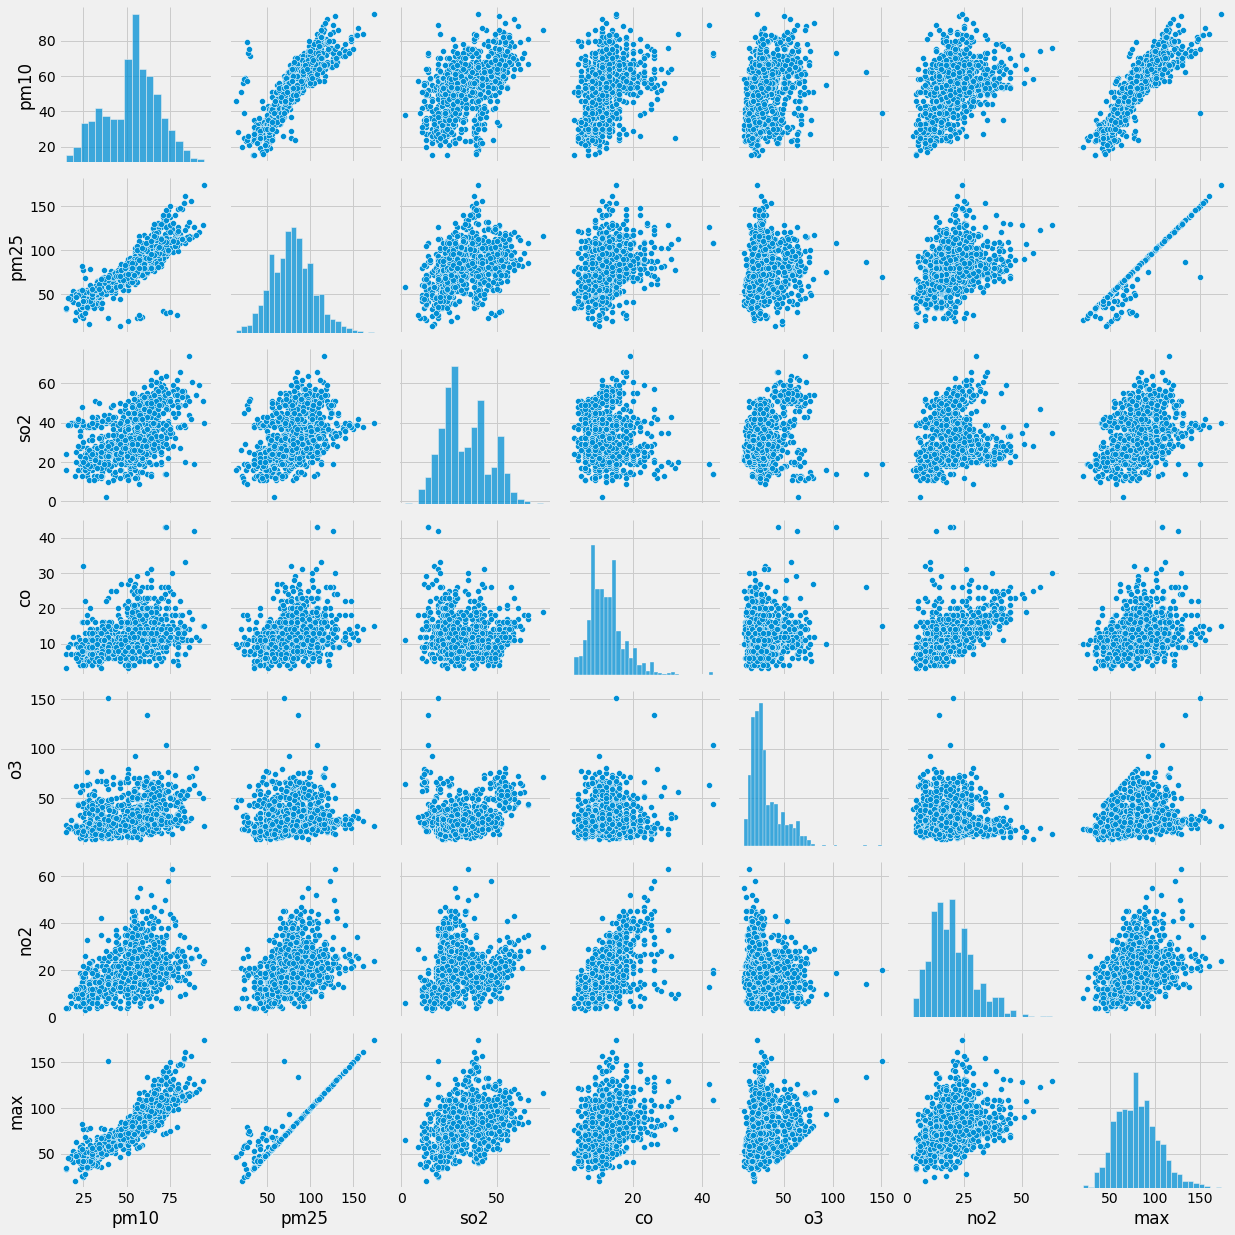

In [48]:
#melihat hubungan antara tiap features dengan seaborn pairplot
sns.pairplot(data=df,kind='scatter')

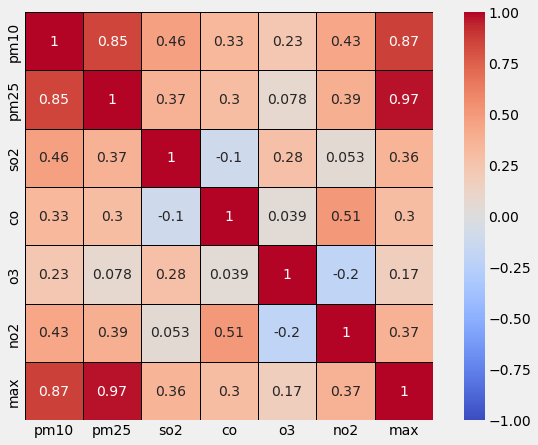

In [49]:
#melihat heatmap dari setiap features
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

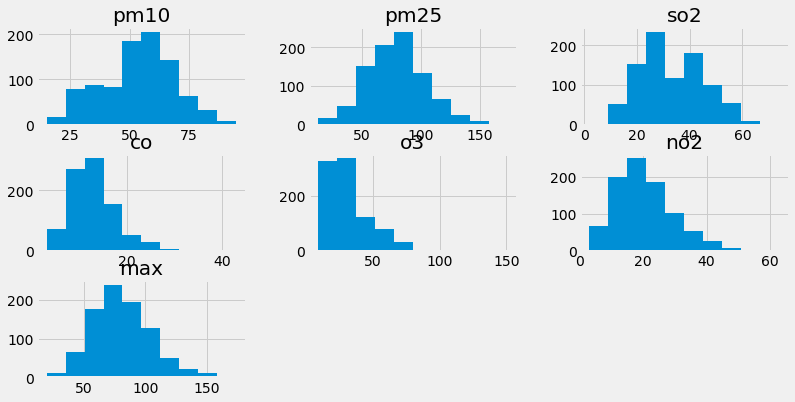

In [50]:
#melihat histogram plot dari tiap features
df.hist(linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

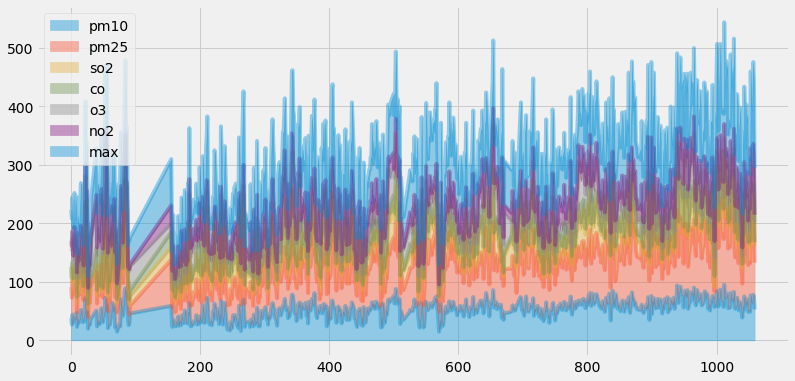

In [51]:
#melihat area plot dari setiap features
df.plot.area(y=['pm10','pm25','so2','co','o3','no2','max'],alpha=0.4,figsize=(12, 6));

Text(0.5, 1.0, 'General Statistics of Indeks Standar Pencemaran Udara Dataset')

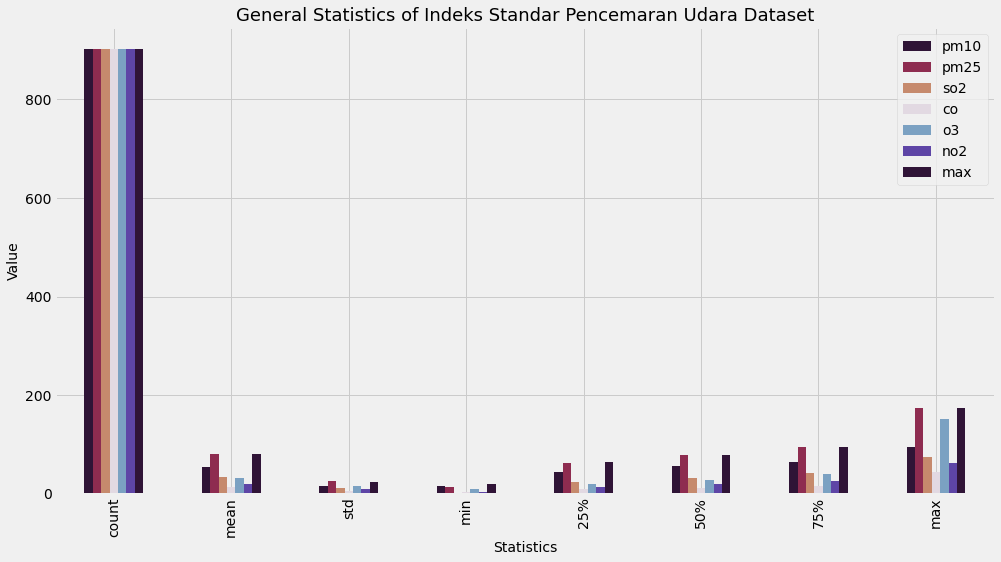

In [52]:
#melihat bar plot stastik deskriptif dari data df 
df.describe().plot(kind = "bar", figsize = (15,8), colormap="twilight_shifted_r")
plt.xlabel('Statistics',fontsize=14)
plt.ylabel('Value',fontsize=14)
plt.title("General Statistics of Indeks Standar Pencemaran Udara Dataset",fontsize=18)

# Menelaah data pada kolom sumbu X terhadap kolom kategori
## pm10,pm25,so2,co,o3,no2,max

Text(0.5, 1.0, 'Category Type Count')

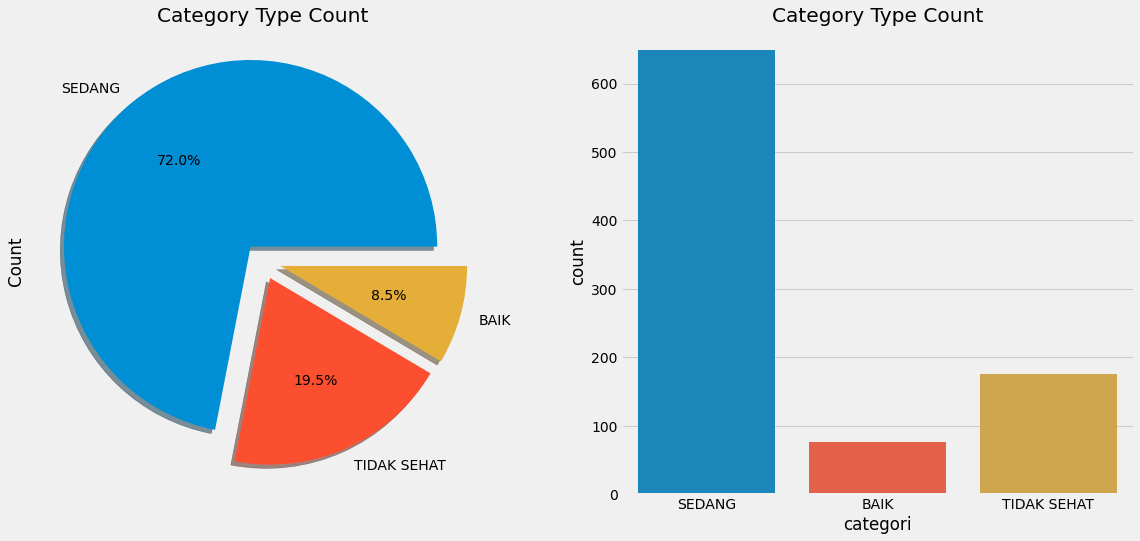

In [53]:
#melihat pie plot dan bar plot
f,ax=plt.subplots(1,2,figsize=(18,8))
df['categori'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Category Type Count')
ax[0].set_ylabel('Count')
sns.countplot('categori',data=df,ax=ax[1])
ax[1].set_title('Category Type Count')

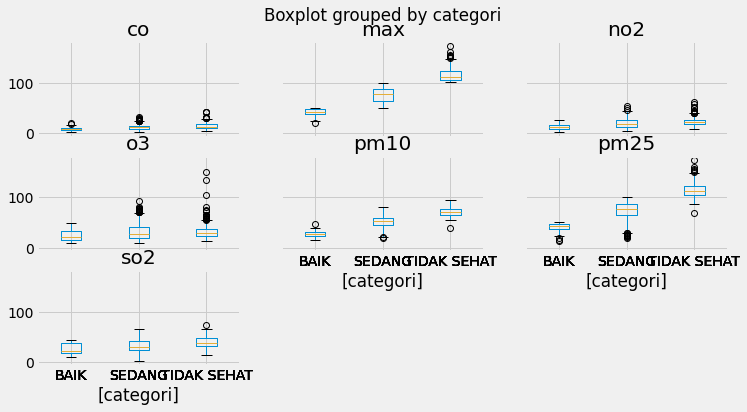

In [54]:
#melihat boxplot berdasarkan kategori
df.boxplot(by="categori", figsize=(12, 6))
pass

<AxesSubplot:xlabel='categori', ylabel='co'>

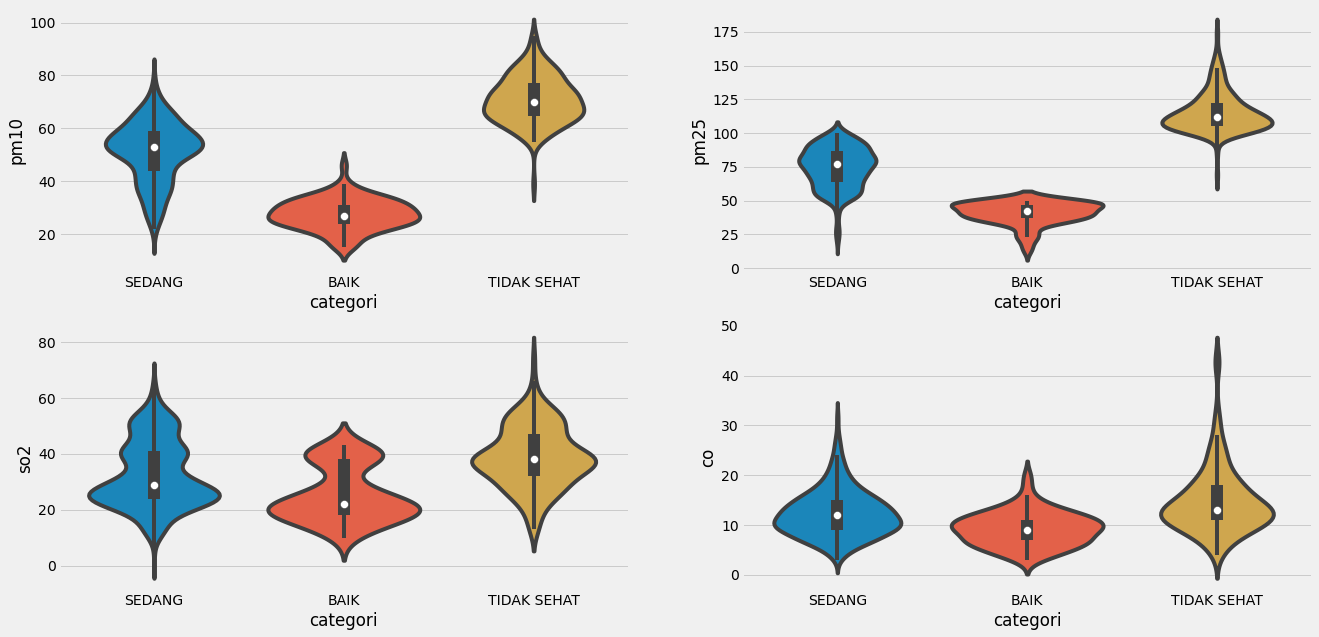

In [55]:
#melihat violin plot berdasarkan kategori (pm10,pm25, so2,co)
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.violinplot(x='categori',y='pm10',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='categori',y='pm25',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='categori',y='so2',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='categori',y='co',data=df)

<AxesSubplot:xlabel='categori', ylabel='max'>

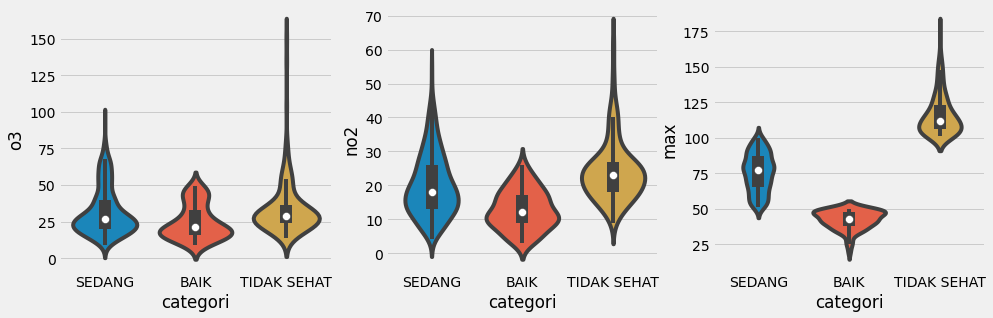

In [56]:
#melihat violin plot berdasarkan kategori (o3,no2,max)
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.violinplot(x='categori',y='o3',data=df)
plt.subplot(2,4,2)
sns.violinplot(x='categori',y='no2',data=df)
plt.subplot(2,4,3)
sns.violinplot(x='categori',y='max',data=df)

# Menelaah data pada kolom sumbu X terhadap kolom kategori
## pm10,pm25,so2,co,o3,no2,max

Text(0.5, 1.0, 'Critical Type Count')

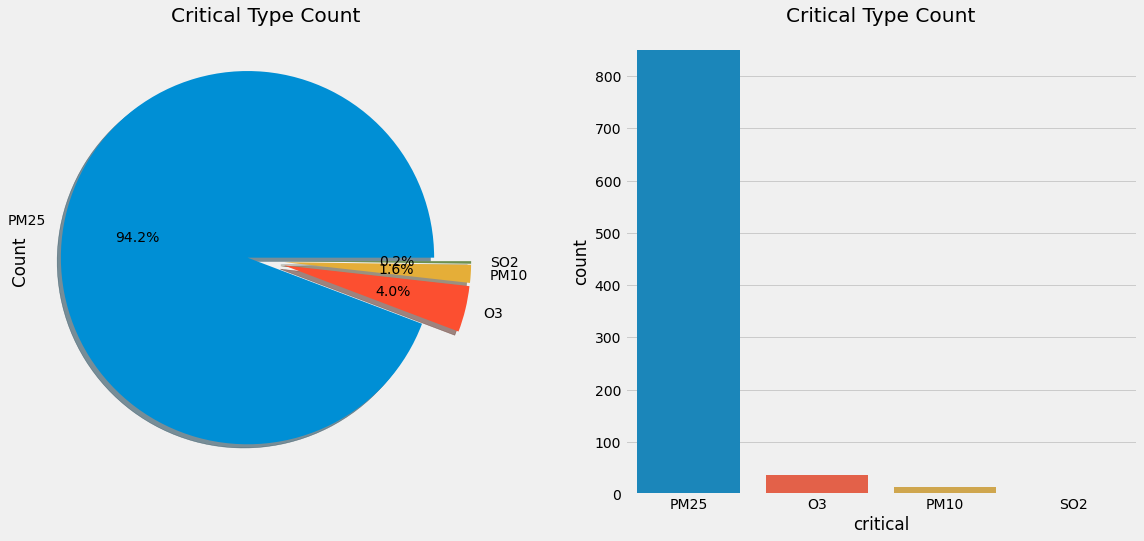

In [57]:
#melihat pie dan bar plot dari citical type count dan count
f,ax=plt.subplots(1,2,figsize=(18,8))
df['critical'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Critical Type Count')
ax[0].set_ylabel('Count')
sns.countplot('critical',data=df,ax=ax[1])
ax[1].set_title('Critical Type Count')

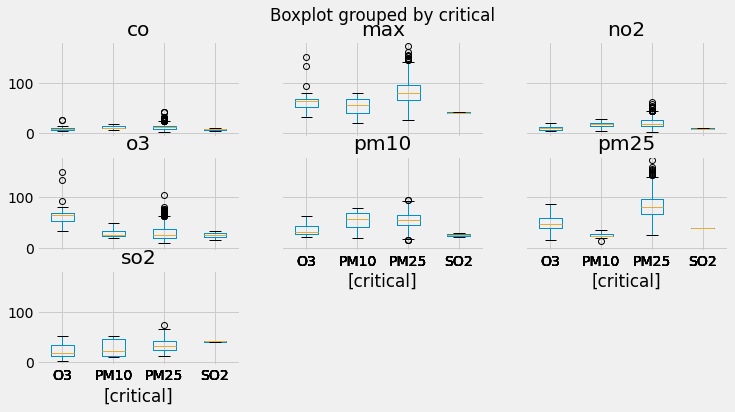

In [58]:
#melihat box plot berdasarkan features critical
df.boxplot(by="critical", figsize=(12, 6))
pass

<AxesSubplot:xlabel='critical', ylabel='co'>

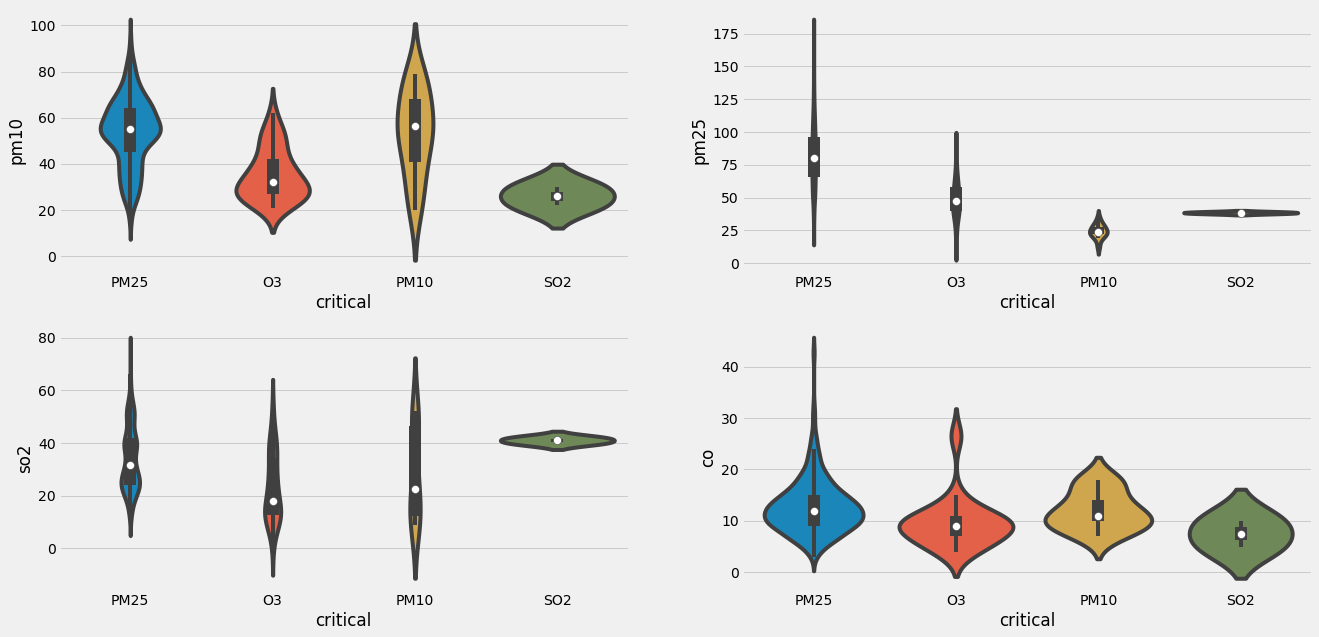

In [59]:
#melihat violin plot dengan sumbu x merupakan nilai critical dan sumbu y merupakan pm10 pm25 so2 dan co
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.violinplot(x='critical',y='pm10',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='critical',y='pm25',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='critical',y='so2',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='critical',y='co',data=df)

<AxesSubplot:xlabel='critical', ylabel='max'>

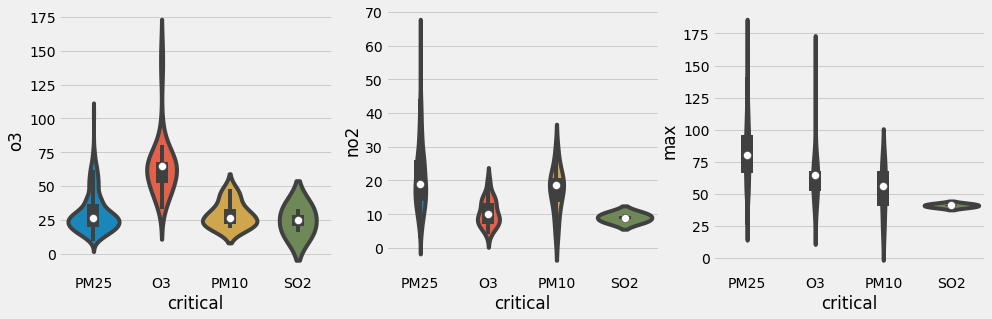

In [60]:
#melihat violin plot dengan sumbu x merupakan nilai critical dan sumbu y merupakan o3 no2 max
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.violinplot(x='critical',y='o3',data=df)
plt.subplot(2,4,2)
sns.violinplot(x='critical',y='no2',data=df)
plt.subplot(2,4,3)
sns.violinplot(x='critical',y='max',data=df)

# model

In [83]:
#membaca file csv dari penyimpanan lokal
#df = pd.read_csv('indeks-standar-pencemar-udara-di-spku-bulan-januari-juli-2021.csv')
#membaca file csv dari raw file github
df = pd.read_csv('https://raw.githubusercontent.com/SMAMHTN/Final-Project-Microcredential/main/Pengerjaan/indeks-standar-pencemar-udara-di-spku-bulan-januari-juli-2021.csv')
df = df.dropna(axis=0)
df.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-01-01,DKI1 (Bunderan HI),38.0,53.0,29.0,6.0,31.0,13.0,53,PM25,SEDANG
1,2021-01-02,DKI1 (Bunderan HI),27.0,46.0,27.0,7.0,47.0,7.0,47,O3,BAIK
2,2021-01-03,DKI1 (Bunderan HI),44.0,58.0,25.0,7.0,40.0,13.0,58,PM25,SEDANG
3,2021-01-04,DKI1 (Bunderan HI),30.0,48.0,24.0,4.0,32.0,7.0,48,PM25,BAIK
4,2021-01-05,DKI1 (Bunderan HI),38.0,53.0,24.0,6.0,31.0,9.0,53,PM25,SEDANG


In [84]:

x = df[['pm10','so2','co','o3','no2','max']]
Y = df['categori']



In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
scaler.fit_transform(x)

xtrain, xtest, Ytrain,Ytest = train_test_split(x,Y, train_size=0.7,random_state=1)

In [86]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(max_depth=2, random_state=0)
RFC.fit(xtrain,Ytrain)

RandomForestClassifier(max_depth=2, random_state=0)

In [87]:
from sklearn.metrics import accuracy_score
ypred = RFC.predict(xtest)

In [89]:
accuracy_score(Ytest,ypred)

0.933579335793358